## Data Modelling using Neural Network - RNN-LSTM
_________________________________________________


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
# Importing dependencies for vectorization and ML/DL
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Input, LSTM, Bidirectional, Dropout
from tensorflow.keras.models import Model
import sklearn as skl
import nltk
from nltk import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import classification_report, accuracy_score

# Downloading required pakage
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Reading cleaned file with text for model creation
news_csv = Path('/content/drive/MyDrive/nlp_cleaned_news.csv')
news_df = pd.read_csv(news_csv)

In [ ]:
news_df = news_df.drop(['Unnamed: 0'], axis=1)
news_df.head()

,text,class
0,budget fight loom republicans flip fiscal scri...,1
1,military accept transgender recruit monday pen...,1
2,senior republican senator let mr mueller job w...,1
3,fbi russia probe help australian diplomat tip ...,1
4,trump want postal service charge amazon shipme...,1


In [ ]:
news_df.dropna(inplace = True)
news_df.count()

text     44678
class    44678
dtype: int64

### Data Preperation for model training

Ref to understand Vectorization techniques: https://neptune.ai/blog/vectorization-techniques-in-nlp-guide

In [ ]:
# Creating a list of words
list_of_words = []
for i in news_df.text:
    for j in i.split():
      list_of_words.append(j.strip())

# Total unique words
all_words = len(list(set(list_of_words)))
all_words

83945

In [ ]:
# length of longest text
# Finding the maximum number of words in a row
maxlen = -1
for doc in news_df.text:
    tokens = nltk.word_tokenize(doc)
    if (maxlen < len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any row ", maxlen)

The maximum number of words in any row  4456


In [ ]:
# Displaying the dataframe
news_df.head()

,text,class
0,budget fight loom republicans flip fiscal scri...,1
1,military accept transgender recruit monday pen...,1
2,senior republican senator let mr mueller job w...,1
3,fbi russia probe help australian diplomat tip ...,1
4,trump want postal service charge amazon shipme...,1


In [ ]:
# splitting training/test datasets

X_train, X_test, y_train, y_test = train_test_split(news_df["text"], news_df["class"], random_state=42)

In [ ]:
# Displaying the shape of train and test datasets
print(X_train.shape)
print(X_test.shape)

(33508,)
(11170,)


In [ ]:
# word tokenization
tokenizer = Tokenizer(num_words = all_words)
tokenizer.fit_on_texts(news_df["text"])
train_sequence = tokenizer.texts_to_sequences(X_train)
test_sequence = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Displaying train sequence
train_sequence[0]

[522,
 1382,
 31,
 892,
 861,
 1041,
 6215,
 1841,
 24,
 1061,
 3,
 3277,
 1382,
 143,
 31,
 892,
 861,
 694,
 1041,
 6215,
 1,
 63,
 522,
 314,
 4244,
 2263,
 413,
 1346,
 216,
 2286,
 1382,
 125,
 154,
 154,
 83,
 1841,
 3,
 1178,
 410,
 111,
 59,
 90,
 701,
 29,
 1,
 547,
 351,
 238,
 94,
 565,
 1,
 712,
 2023,
 51,
 6359,
 44,
 2797,
 1832,
 4244,
 2263,
 413,
 522,
 63,
 429,
 1994,
 379,
 4358,
 3513,
 861,
 415,
 78,
 413,
 522,
 246,
 861,
 877,
 8917,
 550,
 157,
 1041,
 469,
 288,
 341,
 91,
 361,
 861,
 1041,
 3949,
 267,
 892,
 771,
 242,
 38,
 1382,
 1,
 129,
 68,
 3896,
 20,
 721,
 415,
 221,
 6364,
 1022,
 1041,
 633,
 861,
 834,
 13,
 155,
 150,
 1418,
 522,
 814,
 2864,
 2392,
 861,
 2443,
 432,
 484,
 29,
 866,
 413,
 983,
 9647,
 190,
 1382,
 410,
 1,
 124,
 36,
 446,
 559,
 216,
 44,
 524,
 927,
 956,
 3,
 2528,
 271,
 1087,
 13,
 991,
 184,
 3379,
 1033,
 4212,
 717,
 113,
 27196,
 115,
 216,
 728,
 2354,
 342,
 393,
 311,
 1931,
 162,
 294,
 1,
 410,
 44,
 1087,
 

In [ ]:
# Padding
pad_train = pad_sequences(train_sequence, maxlen = 4456, padding = 'post', truncating = 'post' )
pad_test = pad_sequences(test_sequence, maxlen = 4456, padding = 'post')

In [ ]:
# Displaying a row of padded data
pad_train[0]

array([ 522, 1382,   31, ...,    0,    0,    0], dtype=int32)

### Model Trial 1 - LSTM

In [ ]:
# Building the LSTM Model
model1 = Sequential()
model1.add(Embedding(all_words, output_dim = 200))
model1.add(LSTM(100))
model1.add(Dense(100, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 200)         16789000  
                                                                 
 lstm (LSTM)                 (None, 100)               120400    
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 16919601 (64.54 MB)
Trainable params: 16919601 (64.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compiling the model
model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Model training
history = model1.fit(pad_train, y_train, validation_split=0.2, epochs=2, batch_size=200, shuffle=True, verbose = 1)

Epoch 1/2
135/135 [==============================] - 63s 467ms/step - loss: 0.6916 - accuracy: 0.5282 - val_loss: 0.6925 - val_accuracy: 0.5209
Epoch 2/2
135/135 [==============================] - 62s 458ms/step - loss: 0.6916 - accuracy: 0.5282 - val_loss: 0.6923 - val_accuracy: 0.5209


#### Accuracy is almost constant at 0.52

### Model Trial 2 - Two LSTM layers

In [ ]:
# Building the LSTM Model
model1 = Sequential()
model1.add(Embedding(all_words, output_dim = 250, input_length=4456))
model1.add(LSTM(150, return_sequences=True))
model1.add(LSTM(75))
model1.add(Dense(75, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 4456, 250)         20986250  
                                                                 
 lstm_3 (LSTM)               (None, 4456, 150)         240600    
                                                                 
 lstm_4 (LSTM)               (None, 75)                67800     
                                                                 
 dense_4 (Dense)             (None, 75)                5700      
                                                                 
 dense_5 (Dense)             (None, 1)                 76        
                                                                 
Total params: 21300426 (81.25 MB)
Trainable params: 21300426 (81.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compiling the model
model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Model training
history = model1.fit(pad_train, y_train, validation_split=0.2, epochs=2, batch_size=64, shuffle=True, verbose = 1)

Epoch 1/2
419/419 [==============================] - 230s 536ms/step - loss: 0.6922 - accuracy: 0.5266 - val_loss: 0.6925 - val_accuracy: 0.5209
Epoch 2/2
419/419 [==============================] - 213s 509ms/step - loss: 0.6917 - accuracy: 0.5282 - val_loss: 0.6925 - val_accuracy: 0.5209


#### Accuracy seems to be similar to that with single LSTM but could explore more

### Model Test 3 - Bidirectional LSTM

In [ ]:
# Building the LSTM Model
model1 = Sequential()
model1.add(Embedding(all_words, output_dim = 256))
model1.add(Bidirectional(LSTM(128)))
model1.add(Dense(64, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 256)         21489920  
                                                                 
 bidirectional (Bidirection  (None, 256)               394240    
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 21900673 (83.54 MB)
Trainable params: 21900673 (83.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compiling the model
model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Model training
history = model1.fit(pad_train, y_train, validation_split=0.2, epochs=3, batch_size=64, shuffle=True, verbose = 1)

Epoch 1/3
419/419 [==============================] - 240s 551ms/step - loss: 0.0411 - accuracy: 0.9821 - val_loss: 0.0067 - val_accuracy: 0.9982
Epoch 2/3
419/419 [==============================] - 217s 518ms/step - loss: 8.4818e-04 - accuracy: 0.9999 - val_loss: 0.0054 - val_accuracy: 0.9987
Epoch 3/3
419/419 [==============================] - 203s 484ms/step - loss: 9.2755e-05 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 0.9987


In [ ]:
# Printing model loss and accuracy on test data
model_loss, model_accuracy = model1.evaluate(pad_test,y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

350/350 - 39s - loss: 0.0063 - accuracy: 0.9985 - 39s/epoch - 110ms/step
Loss: 0.0062997424975037575, Accuracy: 0.9984780550003052


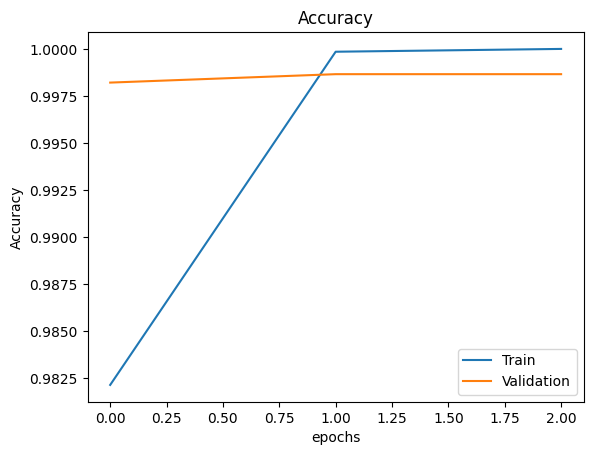

In [ ]:
# Plotting Accuracy of Train vs Validation data while training
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Validation")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epochs")
plt.legend()
plt.show()

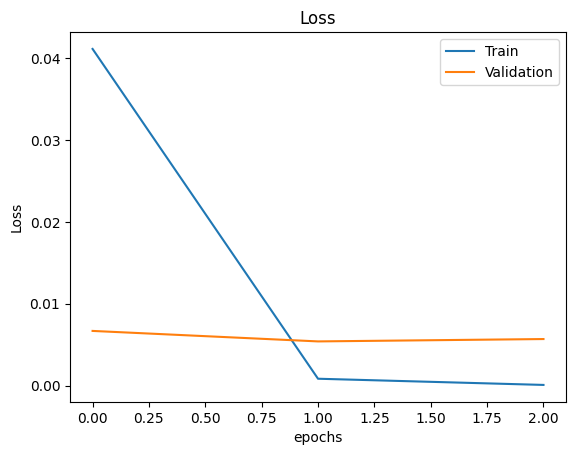

In [ ]:
# Plotting Losses of Train vs Validation data while training
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Validation")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.legend()
plt.show()

### **This model looks like a good fit in terms of train and validation accuracy and loss.**

In [ ]:
# Predicting test data using model
pred = model1.predict(pad_test)

# Saving prediction scores in an array
binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

350/350 [==============================] - 40s 110ms/step


In [ ]:
# Printing the accuracy, precision and recall of the model on test data
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))

Accuracy on testing set: 0.9984780662488809
Precision on testing set: 0.9983180713885255
Recall on testing set: 0.9985046728971962


### The testing accuracy is very good at 99.8 %

In [ ]:
# Saving the model

filename = "model_biLSTM.h5"
model1.save(filename, save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y_test.iloc[50:100]

39518    0
38425    0
6803     1
41691    0
18948    1
22895    0
6383     1
6676     1
26134    0
12757    1
19227    1
34438    0
17280    1
2582     1
41955    0
29494    0
38920    0
2875     1
21696    0
16451    1
39693    0
42749    0
1388     1
20631    1
43459    0
7538     1
8568     1
2098     1
38439    0
31810    0
30994    0
24901    0
1566     1
36274    0
41638    0
20744    1
33831    0
17291    1
34753    0
12687    1
27560    0
38376    0
26759    0
42293    0
35529    0
39913    0
6847     1
44044    0
43608    0
1000     1
Name: class, dtype: int64

In [ ]:
# Text for testing
sample = ['factbox bannon exit late trump administration shake reuters president donald trump friday fire chief strategist stephen bannon late white house shake remove far right architect election victory drive force anti globalization pro nationalist agenda follow partial list official fire leave administration trump take office jan people nominate trump position job philip bilden private equity executive military intelligence officer pick trump secretary navy withdraw consideration february government conflict interest rule james comey federal bureau investigation director lead probe possible collusion trump presidential campaign russia influence election outcome fire trump james donovan goldman sachs group inc banker nominate trump deputy treasury secretary withdraw michael dubke founder crossroad medium resign white house communications director michael flynn resign february trump national security adviser disclosure discuss sanction russia russian ambassador united states trump take office mislead vice president mike pence conversation mark green trump nominee army secretary serve special operation aviation regiment withdraw consideration gerrit lanse white house chief digital officer step february fail pass fbi background check accord politico jason miller communication director trump transition team name president elect december white house communications director say day later job reince priebus chairman republican national committee replace john kelly trump chief staff friday confidant president say trump lose confidence priebus major legislative item fail pass congress todd ricketts co owner chicago cub baseball team trump choice deputy secretary commerce withdraw consideration april anthony scaramucci white house communications director fire trump july day job profanity lace comment new yorker magazine publish walter shaub head office government ethic clash trump administration step july year term end michael short senior white house assistant press secretary resign july sean spicer resign white house press secretary july end turbulent tenure trump name scaramucci white house communications director robin townley aide national security adviser flynn reject february deny security clearance serve national security council accord politico vincent viola army veteran chairman new york mercantile exchange nominate trump secretary army withdraw consideration february katie walsh deputy white house chief staff transfer outside pro trump group america policy march accord politico caroline wiles trump director scheduling resign february fail background check accord politico sally yate act attorney general fire trump january order justice department lawyer enforce trump immigration ban']

In [ ]:
# word tokenization
test_seq = tokenizer.texts_to_sequences(sample)

In [ ]:
pad_test = pad_sequences(test_seq, maxlen = 4456, padding = 'post')
pad_test

array([[3219, 1202, 1804, ...,    0,    0,    0]], dtype=int32)

In [ ]:
prediction = model1.predict(pad_test)
prediction

1/1 [==============================] - 0s 122ms/step


array([[0.9999963]], dtype=float32)

In [ ]:
# Loading saved model
from tensorflow.keras.models import load_model
loaded_model = load_model('model_biLSTM.h5')

In [ ]:
# Function for data cleaning
import spacy
nlp = spacy.load('en_core_web_sm')

def data_cleaning(text):

    # changing to lower case
    text = text.lower()

    # Getting document ready for NLP tasks
    doc = nlp(text)

    # Empty list for storing cleaned data
    clean_text = ""

    # Remove stop words and lemmatize
    lemmas = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

    # Join the lemmas back into a string
    clean_text = ' '.join(lemmas)

    return(clean_text)

In [ ]:
# True
check = "WASHINGTON (Reuters) - The U.S. House of Representatives on Friday approved legislation to continue a federal insurance program for millions of lower-income children and pregnant women, but with an ongoing funding battle it could be weeks before the program gets more money."

In [ ]:
# Fake
check = "This NRA Commercial Is So Stupid It Will Melt Your Brain (VIDEO) A few days after the Planned Parenthood shooting in Colorado Springs that left three dead and twelve injured, the National Rifle Association (NRA) released the dumbest pro-gun commercial likely ever seen. In the months since the commercial was released and in the aftermath of more mass shootings, it has popped up on my television screen multiple times. Every single time I see it my brain melts a l"

In [ ]:
clean_text = data_cleaning(check)

In [ ]:
# Displaying clean text
clean_text

'nra commercial stupid melt brain video day plan parenthood shooting colorado spring leave dead injure national rifle association nra release dumb pro gun commercial likely see month commercial release aftermath mass shooting pop television screen multiple time single time brain melt l'

In [ ]:
# Converting clean data to series
clean_text_ser = pd.Series(clean_text)

In [ ]:
# Vectorizing clean data
sample_sequence = tokenizer.texts_to_sequences(clean_text_ser)
pad_sample = pad_sequences(sample_sequence, maxlen = 4456, padding = 'post')
# Predicting outcome
prediction = loaded_model.predict(pad_sample)
# Printing outcome based on predicted value
if prediction[0] < 0.5:
    print("Prediction of the News :  Fake")
else:
    print("Prediction of the News : Real")


1/1 [==============================] - 0s 120ms/step
Prediction of the News :  Fake
